# Project: Wrangle and Analyze WeRateDogs Twitter datasets

## Table of content
<ul>
<li><a href="#gather"> Data Gathering </a></li>
<li><a href="#assess"> Data Assessment</a></li>
<li><a href="#clean"> Data Cleaning </a></li>
<li><a href="#store"> Data Storage</a></li>
<li><a href="#analyze"> Data Analysis & Visualization </a></li>

<a id='gather'></a>

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. 

**Note:** the methods required to gather each data are different.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
pd.set_option('display.max_colwidth', 1000)

#### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Load the downloaded dataset
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

# View first 5 rows
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# URL provided by Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(r.content)
    
# Check available files in the current directory
os.listdir()

['image-predictions.tsv',
 '.ipynb_checkpoints',
 'wrangle_act.ipynb',
 'act_report.ipynb',
 'twitter-archive-enhanced.csv',
 'wrangle_report.ipynb']

The `image-predictions.tsv` has been downloaded. Now let's read it into a dataframe.

In [4]:
# Load the dataset
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

# View first 5 rows
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

The Twitter archive provided by Udacity doesn't have retweet and favorite counts. Therefore, I will use the Tweepy l. Note that the `consumer_key`, `consumer_secret`, `access_token`, and `access_secret` have been hidden for confidentiality.

Now I will read this file line by line to create a dataframe with retweet and favorite counts. Some of the tweets in the Twitter archive dataset provided by Udacity may have been deleted, so I will also keep track of this. 

I use 2 blocks of code above to gather data from Twitter but receive an empty dataframe. I also use the provided code in the class `twitter_api.py` to test.

The result has a lot of fails so I pick one `tweet_id` to test `tweet = api.get_status(tweet_id, tweet_mode='extended')` and receive this error:
>*message - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here:  https://developer.twitter.com/en/portal/product*

It turns out that the error is caused because of some conflicts between API v1.1 and v2 in my account. When I try to use the API v2 `Client.get_tweets` as mentioned in this [Tweepy documentation](https://docs.tweepy.org/en/stable/client.html#tweepy.Client.get_tweets), I confront the `403 Forbidden` error.

When I research on the Internet, I find out [this thread](https://twittercommunity.com/t/453-you-currently-have-access-to-twitter-api-v2-endpoints-and-limited-v1-1-endpoints-only/194140/52) with full of complaints about that. Currently, it hasn't been resolved. 

**I have no choice but to use the provided `tweet-json.txt` file on Udacity.**

In [5]:
# URL provided by Udacity
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(r.content)

In [6]:
df_list = []
with open('tweet-json.txt', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    # read tweet JSON file line by line
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})

# Turn the list to Dataframe
df_tweet = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

# Check result
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
## Data Assessment
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment and programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Now I'm going to assess three dataframes
* `df_archive`: the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
* `df_image`: the tweet image prediction (image_predictions.tsv)
* `df_tweet`: the Twitter API (tweet_json.txt)

### Visual assessment

In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

* `rating_numerator` has some values below 10

* There are some incorrect names like *such, quite, a, an, the*, etc. All names should start with a capital letter. *None* should be replaced by `NaN`

* There are lots of *None* values in `doggo`, `floofer`, `pupper`, and `puppo`. These strings should be replaced by `NaN`.

In [8]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


* Values in `p1`, `p2` and `p3` are inconsistent in their capitalization ('redbone', 'Lhasa') and have underscore sign ('Bernese_mountain_dog')

In [9]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Programatic assessment

#### `df_archive` dataframe

In [10]:
# Check data types and nulls of 'df_archive'
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* There are lots of nulls in 2 `in_reply_` columns, 3 `retwweted_` columns, and `expanded_urls` column
* `doggo`, `floofer`, `pupper` and `puppo` should be merged to one column
* `timestamp` should be *datetime*, instead of *string*.
    
Since I only want original ratings that have images, retweets should be deleted. Let's check if they are in the same rows, so I can easily drop them later.

In [11]:
# If retweets are in the same rows, the result will be 181
len(df_archive[
    df_archive['retweeted_status_id'].notnull()
    & df_archive['retweeted_status_user_id'].notnull()
    & df_archive['retweeted_status_timestamp'].notnull()
])

181

In [12]:
# Recall from the Visual Assessment part, check incorrect names
df_archive[df_archive.name.str.islower() | (df_archive.name == 'None')].name.value_counts()

None            745
a                55
the               8
an                7
very              5
quite             4
one               4
just              4
mad               2
not               2
getting           2
actually          2
incredibly        1
my                1
space             1
light             1
all               1
this              1
officially        1
infuriating       1
unacceptable      1
such              1
life              1
his               1
old               1
by                1
Name: name, dtype: int64

In [13]:
# Check 4 columns related to dog stages
df_archive.groupby(['doggo', 'floofer', 'pupper', 'puppo'])[['tweet_id']].count()

tweet_id
doggo floofer pupper puppo          
None  None    None   None       1976
                     puppo        29
              pupper None        245
      floofer None   None          9
doggo None    None   None         83
                     puppo         1
              pupper None         12
      floofer None   None          1

There are some weird things here:
* 1 unique `tweet_id` has 2 dog stages: *doggo* and *puppo*
* 12 unique `tweet_id`s have 2 dogs stages: *doggo* and *pupper*
* 1 unique `tweet_id` have 2 stages: *doggo* and *floofer*

In [14]:
# Check summary statistics of numerical columns in 'df_archive'
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


* `rating_numerator` has values less than 10 (min is 0)
* `rating_denominators` has values different from 10 (mean > 10)

In [15]:
# Check 'rating_numerator' to confirm it has values < 10
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
# Check 'rating_denominator' to confirm it has values != 10
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
# Zoom out records that have 'rating_numerator' < 10
df_archive[df_archive.rating_numerator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541936185344/photo/1,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None


In [18]:
# Zoom out records that have 'rating_denominator' != 10
df_archive[df_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

When skimming the `text` column, I notice that:
* for `tweet_id` = 883482846933004288, the `rating_numerator` should be 13.5, not 5 as recorded.
* for `tweet_id` = 775096608509886464, the data mistakenly take the event 9/11 as the rating while it should be 14/10.
* for `tweet_id` = 682962037429899265, the data mistakenly take the store 7/11 as the rating while it should be 10/10.
* for `tweet_id` = 666287406224695296, the rating is actually 9/10.
* for `tweet_id` = 810984652412424192, the data mistakenly take 24/7 as the rating while it should be `NAN`.

So there are 2 common issues here:
* Incorrect fractions like 9/11, 7/11 or 24/7 are taken in `rating_numerator` and `rating_denominator`, instead of the actual rating
* Decimals in `rating_numerators`

#### `df_image` dataframe

In [19]:
# Check data types and nulls of 'df_image'
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Check duplicated records
df_image.duplicated().sum()

0

In [21]:
# Check duplicated 'tweet_id'
df_image.tweet_id.duplicated().sum()

0

* There are some missing images (only 2075 in `tweet_id` out of possible 2356 in `df_archive`)

In [22]:
# Check duplicated 'jpg_url'
df_image.jpg_url.duplicated().sum()

66

In [23]:
# Look up duplicated image_url in df_archive
duplicated_jpg_url = df_image[df_image.duplicated('jpg_url')]['tweet_id']
df_archive.query('tweet_id in @duplicated_jpg_url')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,"https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1",14,10,Walter,None,None,None,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,"https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",13,10,None,None,None,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,"https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1",13,10,Astrid,doggo,None,None,None
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,"https://twitter.com/dog_rates/status/807106840509214720/video/1,https://twitter.com/dog_rates/status/807106840509214720/video/1",13,10,Stephan,None,None,None,None
266,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,"https://twitter.com/dog_rates/status/817423860

It seems like these duplicated `jpg_url` are related to retweets.

In [24]:
# Confirm the number of retweets within duplicated 'jpg_url'
df_archive.query('tweet_id in @duplicated_jpg_url')['retweeted_status_id'].count()

66

These 66 duplicated `jpg_url` should not be in the final dataframe.

In [25]:
# Check summary statistics of numerical columns in 'df_image'
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


It's quite odd here when the maximum value of `p1_conf` is 1, that of `p2_conf` and `p3_conf`  are greater than 0. 

In [26]:
# Check rows that have total confidence greater than 1
df_image.query('p1_conf + p2_conf + p3_conf > 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


The image prediction in this row is a *doormat*, not the dog breed (`p1_dog`, `p2_dog` and `p3_dog` are False), so I want to check if there are any similar cases.

In [27]:
# Check images that are not dogs
df_image.query('(p1_dog == False) & (p2_dog == False) & (p3_dog == False)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


Since I only care about dog images, these rows should be dropped.

#### `df_tweet` dataframe

In [28]:
# Check data types and nulls of df_image
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [29]:
# Check duplicated records
df_tweet.duplicated().sum()

0

In [30]:
# Check duplicated tweet_id in 'df_tweet'
df_tweet.tweet_id.duplicated().sum()

0

* There are some missing tweets (only 2354 `tweet_id` out of 2356 in `df_archive`)

In [31]:
# Check summary statistics of numerical columns in 'df_tweet'
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


I want to check records that have `favorite_count` is 0 to make sure everything is correct.

In [32]:
# Take out the 'tweet_id' where 'favorite_count' = 0 in 'df_tweet'
zero_favorite_count = df_tweet.query('favorite_count == 0')['tweet_id']

# View those 'tweet_id' in 'df_archive'
df_archive.query('tweet_id in @zero_favorite_count')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,"https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1",12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 

Looking the `text` and `retweeted_status_user_id` columns in `df_archive`, I realize that those `tweet_id` are actually retweets. Therefore, when I drop retweets in `df_archive`, I also need to drop rows that have zero `favorite_count` in `df_tweet`.

In [33]:
# Confirm favorite_count = 0 are retweets
len(df_archive.query('tweet_id in @zero_favorite_count')) == len(zero_favorite_count)

True

<font color='blue'> After visually and programatic assessing 3 dataframes, below is the summary of all **Quality** and **Tidiness** issues.</color>

### Quality issues

#### `df_archive` dataframe

* Incorrect names with *None* and lowercase letters

* *None*  in `doggo`, `floofer`, `pupper`, and `puppo` should be replaced by `NAN`

* 14 records has 2 dog stages (doggo & puppo: 1 record, doggo & pupper: 12 records, doggo & floofer: 1 record)

* `timestamp` should be *datetime*, instead of *string*

* Incorrect fractions like 9/11, 7/11 or 24/7 are taken in `rating_numerator` and `rating_denominator`, instead of the actual rating. Also, `rating_numerator` has decimals


#### `df_image` dataframe

* Missing images (only 2075 `tweet_id` out of 2356 in `df_archive`) **[ignore]**

* 66 duplicated `jpg_url` are related to retweets

* Some images are not about dogs, which should be dropped

* `p1`, `p2` and `p3` are inconsistent in their first capitalization ('redbone', 'Lhasa') and have underscore sign ('shopping_basket')


#### `df_tweet` dataframe

* Missing tweets (only 2354 `tweet_id` out of 2356 in `df_archive`) **[ignore]**



>*Note: Those with the **[ignore]** are records that I can't retrieve.*

### Tidiness issues

#### `df_archive` dataframe
* Redundant retweet rows and columns (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` have values)
* Unnecessary columns: `expanded_urls`, `in_reply_to_status_id`, `in_reply_to_user_id`
* `doggo`, `floofer`, `pupper` and `puppo` are all about dog stages (one variable), so they should merged to one column


#### `df_image` dataframe
* Redundant retweet rows
* Instead of spreading 3 predictions over 9 columns, we only need 4 columns: *prediction number* (1, 2 or 3), *dog breed* (Chihuahua, Golden retriever, etc.), *confidence* (95%, 1%, etc.), and *accuracy* (TRUE or FALSE)

### `df_tweet` dataframe
* Redundant retweet rows (`favorite_count` = 0)


<a id='clean'></a>
## Data Cleaning

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [34]:
# Make copies of original pieces of data
archive_clean = df_archive.copy()
image_clean = df_image.copy()
tweet_clean = df_tweet.copy()

### Issue #1: Redundant retweet rows and columns in 3 dataframes

#### Define
* `archive_clean`: Filter out rows that have values in `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, then drop these 3 columns.

* `image_clean`: Filter only `tweet_id`that are in `archive_clean`. This will also remove 66 duplicated `jpg_url` in `image_clean`.

* `tweet_clean`: Left join with `archive_clean` to put all tweet data into `archive_clean`. This will also remove retweet rows that have `favorite_count` = 0 in `tweet_clean`.

#### Code

In [35]:
# Filter out retweet rows in 'archive_clean'
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

# Drop 3 retweet columns
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [36]:
# 'tweet_id' in 'archive_clean' excluded retweets
archive_ids = archive_clean['tweet_id']

# Filter those 'tweet_id' in 'image_clean'
image_clean = image_clean.query('tweet_id in @archive_ids')

In [37]:
# Left join 'archive_clean' with 'tweet_clean'
archive_clean = archive_clean.merge(tweet_clean, how='left', on='tweet_id')

#### Test

In [38]:
# Check retweet rows in 'archive_clean'
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 16 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
retweet_count            2175 non-null int64
favorite_count           2175 non-null int64
dtypes: float64(2), int64(5), object(9)
memory usage: 288.9+ KB


* 181 retweet rows has been removed, 3 retweet columns has been dropped. 
* 2 columns `retweet_count` and `favorite_count` from `tweet_clean` are available in `archive_clean` now.

In [39]:
# Check 'favorite_count' = 0, should be empty
archive_clean.query('favorite_count == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count


In [40]:
# Check duplicated 'img_url' in 'image_clean': should be 0
image_clean['jpg_url'].duplicated().sum()

0

In [41]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1994 non-null int64
jpg_url     1994 non-null object
img_num     1994 non-null int64
p1          1994 non-null object
p1_conf     1994 non-null float64
p1_dog      1994 non-null bool
p2          1994 non-null object
p2_conf     1994 non-null float64
p2_dog      1994 non-null bool
p3          1994 non-null object
p3_conf     1994 non-null float64
p3_dog      1994 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 161.6+ KB


### Issue #2: Some images in `df_image` are not about dogs

#### Define

* Query `tweet_id` that are not dog images in `image_clean` and filter out rows that have those `tweet_id` 
* Also filter out those irrelevant `tweet_id` in the `archive_clean` dataframe

#### Code

In [42]:
# Filter out rows that are not dog images in 'image_clean'
not_dogs_ids = image_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')['tweet_id']
image_clean = image_clean.query('tweet_id not in @not_dogs_ids')

In [43]:
# Filter out those 'tweet_id' in 'archive_clean'
archive_clean = archive_clean.query('tweet_id not in @not_dogs_ids')

#### Test

In [44]:
# Check images that are not about dogs: should be empty
image_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [45]:
# Check images that have total confidence >1 : should be empty
image_clean.query('p1_conf + p2_conf + p3_conf > 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [46]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1686 non-null int64
jpg_url     1686 non-null object
img_num     1686 non-null int64
p1          1686 non-null object
p1_conf     1686 non-null float64
p1_dog      1686 non-null bool
p2          1686 non-null object
p2_conf     1686 non-null float64
p2_dog      1686 non-null bool
p3          1686 non-null object
p3_conf     1686 non-null float64
p3_dog      1686 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 136.7+ KB


In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 1 to 2174
Data columns (total 16 columns):
tweet_id                 1867 non-null int64
in_reply_to_status_id    75 non-null float64
in_reply_to_user_id      75 non-null float64
timestamp                1867 non-null object
source                   1867 non-null object
text                     1867 non-null object
expanded_urls            1809 non-null object
rating_numerator         1867 non-null int64
rating_denominator       1867 non-null int64
name                     1867 non-null object
doggo                    1867 non-null object
floofer                  1867 non-null object
pupper                   1867 non-null object
puppo                    1867 non-null object
retweet_count            1867 non-null int64
favorite_count           1867 non-null int64
dtypes: float64(2), int64(5), object(9)
memory usage: 248.0+ KB


### Issue #3: Instead of spreading 3 predictions over 9 columns in `df_image`, we only need 4 columns

#### Define
4 target columns we want: `prediction_num`, `dog_breed`, `confidence` and `accuracy`. 

* Since we have 3 variables (`dog_breed`, `confidence` & `accuracy`), define a function to unpivot columns in `image_clean` 3 times and create 3 separate dataframes. Within the function, rename prediction-related columns (p, p_conf, p_dog) to 1, 2, 3 as these are valid values in the `prediction_num` column
* Inner join 3 dataframes based on common columns: `tweet_id`, `jpg_url`, `img_num` and `prediction_num`

#### Code

In [48]:
def melt_images(p1, p2, p3, col):
    '''Return an unpivot dataframe based on columns in the `image_clean` dataframe
    p1 (str): column related to the 1st prediction (p1/p1_conf/p1_dog)
    p2 (str): column related to the 2nd prediction (p2/p2_conf/p2_dog)
    p3 (str): column related to the 3rd prediction (p3/p3_conf/p3_dog)
    col (str): target column that has the prediction values
    '''
    df = image_clean.loc[:, ['tweet_id', 'jpg_url', 'img_num', p1, p2, p3]]
    # rename columns p1,p2,p3 to 1,2,3 
    df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)
    # unpivot columns
    df = pd.melt(
        df,
        id_vars=['tweet_id', 'jpg_url', 'img_num'],
        value_vars=[1, 2, 3], 
        var_name='prediction_num',
        value_name=col
    )
    return df

In [49]:
# Apply the function to upivot columns and create 3 dataframes
image_breed = melt_images('p1', 'p2', 'p3', 'dog_breed')
image_conf = melt_images('p1_conf', 'p2_conf', 'p3_conf', 'confidence')
image_accuracy = melt_images('p1_dog', 'p2_dog', 'p3_dog', 'accuracy')

In [50]:
# Inner join 3 dataframes
image_clean = image_breed.merge(image_conf, how='inner', on=['tweet_id', 'jpg_url', 'img_num', 'prediction_num']) \
                         .merge(image_accuracy, how='inner', on=['tweet_id', 'jpg_url', 'img_num', 'prediction_num'])

#### Test

In [51]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5058 entries, 0 to 5057
Data columns (total 7 columns):
tweet_id          5058 non-null int64
jpg_url           5058 non-null object
img_num           5058 non-null int64
prediction_num    5058 non-null object
dog_breed         5058 non-null object
confidence        5058 non-null float64
accuracy          5058 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 281.5+ KB


In [52]:
image_clean.duplicated().sum()

0

### Issue #4: `p1`, `p2` and `p3` in `df_image` are inconsistent in their first capitalization and have underscore sign

#### Define
`p1`, `p2` and `p3` are now in the `dog_breed` column of the `image_clean` dataframe.


Create a function to replace the underscore sign by a space and capitalize the first letter, then apply that function on the `dog_breed` column.

#### Code

In [53]:
# Create a function 
def modify_dog_breed(str):
    return str.replace('_', ' ').title()

# Apply the function on the 'dog_breed' column
image_clean['dog_breed'] = image_clean['dog_breed'].apply(modify_dog_breed)

#### Test

In [54]:
# Check result
image_clean.head()

,tweet_id,jpg_url,img_num,prediction_num,dog_breed,confidence,accuracy
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh Springer Spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,Redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German Shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian Ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,Miniature Pinscher,0.560311,True


In [55]:
# Check values in the dog_breed column
image_clean.dog_breed.value_counts()

Golden Retriever                  267
Labrador Retriever                267
Chihuahua                         179
Pembroke                          139
Cardigan                          112
Pomeranian                        104
Toy Poodle                        103
Chow                               92
Pug                                92
French Bulldog                     90
Cocker Spaniel                     88
Chesapeake Bay Retriever           87
Eskimo Dog                         81
Beagle                             75
Siberian Husky                     72
Kuvasz                             71
Staffordshire Bullterrier          67
Samoyed                            66
Malamute                           66
Pekinese                           62
Kelpie                             59
American Staffordshire Terrier     56
Miniature Pinscher                 56
Great Pyrenees                     54
Miniature Poodle                   53
Italian Greyhound                  49
Collie      

### Issue #5: Redundant columns in `df_archive`: `expanded_urls` and 2  `in_reply_` columns

#### Define
Drop `expanded_urls`, `in_reply_to_status_id` and `in_reply_to_user_id` using `.drop`

#### Code

In [56]:
archive_clean.drop(['expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 1 to 2174
Data columns (total 13 columns):
tweet_id              1867 non-null int64
timestamp             1867 non-null object
source                1867 non-null object
text                  1867 non-null object
rating_numerator      1867 non-null int64
rating_denominator    1867 non-null int64
name                  1867 non-null object
doggo                 1867 non-null object
floofer               1867 non-null object
pupper                1867 non-null object
puppo                 1867 non-null object
retweet_count         1867 non-null int64
favorite_count        1867 non-null int64
dtypes: int64(5), object(8)
memory usage: 204.2+ KB


### Issue #6: *None* in `doggo`, `floofer`, `pupper`, and `puppo` in `df_archive` should be replaced by `NaN`

#### Define
Use a for loop with `.replace` to replace `None` values by `NaN` in 4 dog stage columns.

#### Code

In [58]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']
for col in cols:
    archive_clean[col].replace('None', np.nan, inplace=True)

#### Test

In [59]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,NaN,NaN,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,NaN,NaN,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,NaN,NaN,NaN,9774,41048
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,NaN,NaN,NaN,NaN,3261,20562


In [60]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 1 to 2174
Data columns (total 13 columns):
tweet_id              1867 non-null int64
timestamp             1867 non-null object
source                1867 non-null object
text                  1867 non-null object
rating_numerator      1867 non-null int64
rating_denominator    1867 non-null int64
name                  1867 non-null object
doggo                 77 non-null object
floofer               10 non-null object
pupper                198 non-null object
puppo                 24 non-null object
retweet_count         1867 non-null int64
favorite_count        1867 non-null int64
dtypes: int64(5), object(8)
memory usage: 204.2+ KB


### Issue #7: `doggo`, `floofer`, `pupper`, and `puppo` in `df_archive` should be merge into 1 column

#### Define
* Create a consolidated column named `dog_stage`. For records that have 2 stages, if values are not *doggo* then *floofer*, then *pupper*, then *puppo*, or `NaN`

* Drop 4 dog stage columns

#### Code

In [61]:
# Create a new column
archive_clean['dog_stage'] = archive_clean['doggo'].fillna(
                                archive_clean['floofer'].fillna(
                                    archive_clean['pupper'].fillna(archive_clean['puppo'])))

# Check 'dog_stage' column: 'dog_stage' should have 'doggo'
archive_clean[archive_clean['doggo'] == 'doggo'].head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_stage
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo,NaN,NaN,NaN,7711,32467,doggo
40,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,12,10,Yogi,doggo,NaN,NaN,NaN,3128,20771,doggo
89,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,12,10,None,doggo,NaN,NaN,NaN,5669,28031,doggo
97,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,12,10,Napolean,doggo,NaN,NaN,NaN,3628,20730,doggo
98,871102520638267392,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14,10,None,doggo,NaN,NaN,NaN,5764,21461,doggo


In [62]:
# Drop 4 dog stage columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [63]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 1 to 2174
Data columns (total 10 columns):
tweet_id              1867 non-null int64
timestamp             1867 non-null object
source                1867 non-null object
text                  1867 non-null object
rating_numerator      1867 non-null int64
rating_denominator    1867 non-null int64
name                  1867 non-null object
retweet_count         1867 non-null int64
favorite_count        1867 non-null int64
dog_stage             298 non-null object
dtypes: int64(5), object(5)
memory usage: 160.4+ KB


In [64]:
archive_clean.dog_stage.value_counts()

pupper     189
doggo       77
puppo       23
floofer      9
Name: dog_stage, dtype: int64

### Issue #8: Incorrect names with None and lowercase letters in `df_archive`

#### Define
Replace incorrect names by `NaN` using `.replace`

#### Code

In [65]:
incorrect_names = archive_clean[archive_clean.name.str.islower() | (archive_clean.name == 'None')].name
archive_clean['name'].replace(incorrect_names, np.nan, inplace=True)

#### Test

In [66]:
# Check incorrect names: should be empty
archive_clean[archive_clean.name.str.islower() | (archive_clean.name == 'None')].name

Series([], Name: name, dtype: object)

### Issue #9: `timestamp` column in `df_archive` should be `datetime`, instead of `string`

#### Define
Use `.astype` to convert the `timestamp` column to `datetime64`

#### Code

In [67]:
archive_clean.timestamp = archive_clean.timestamp.astype('datetime64')

#### Test

In [68]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 1 to 2174
Data columns (total 10 columns):
tweet_id              1867 non-null int64
timestamp             1867 non-null datetime64[ns]
source                1867 non-null object
text                  1867 non-null object
rating_numerator      1867 non-null int64
rating_denominator    1867 non-null int64
name                  1228 non-null object
retweet_count         1867 non-null int64
favorite_count        1867 non-null int64
dog_stage             298 non-null object
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 240.4+ KB


### Issue #10: Rating columns take incorrect fractions like 9/11, 7/11 or 24/7,  `rating_numerator` has decimals

#### Define

Extract the `rating_numerator` and `rating_denominator` from the `text` column, then convert them to `float` data types.

#### Code

In [69]:
# Define the pattern
pattern = '(\d+\.?\d*)/(\d+\.?\d*)'

# Extract the numerator and denominator
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean['text'].str.extract(pattern)

# Convert 2 rating columns to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)

#### Test

In [70]:
archive_clean.query('rating_denominator != 10.')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
263,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0
287,@docmisterio account started on 11/15/15,11.0,15.0
363,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
429,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
733,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
890,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
987,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1024,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1050,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1075,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0


Some records still can't catch the correct `rating_numerator` and `rating_denominator` in the `text` column.

#### Define

* Reset index, then create 2 dictionaries to manually correct values in `rating_numerator` and `rating_denominator` for those special cases
* Fill in `NaN` for rows that don't have legitimate ratings.

#### Code

In [71]:
# Reset index
archive_clean.reset_index(drop=True, inplace=True)

# View the new index of those special cases
archive_clean.query('rating_denominator != 10.')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
236,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0
259,@docmisterio account started on 11/15/15,11.0,15.0
332,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
392,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
664,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
800,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
887,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
920,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
944,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
964,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0


In [72]:
# Use dictionaries to capture index and correct numerator or denominator
numerator_dict = {236: 13., 800: 14., 887: 13., 920: 11., 1324: 10, 1849: 9.}
denominator_dict = {236: 10., 800: 10., 887: 10., 920: 10., 1324: 10, 1849: 10}

# Get the column index of 'rating_numerator' and 'rating_denominator'
index_numerator = archive_clean.columns.get_loc('rating_numerator')
index_denominator = archive_clean.columns.get_loc('rating_denominator')

# 6 is the index of 'rating_numerator' column
for index, numerator in numerator_dict.items():
    archive_clean.iloc[index, index_numerator] = numerator

# 7 is the index of 'rating_denominator' column
for index, denominator in denominator_dict.items():
    archive_clean.iloc[index, index_denominator] = denominator

In [73]:
# Index list of other cases
index_special = archive_clean.query('rating_denominator != 10.').index

# Fill in NaN for rows that don't have legitimate ratings
for i in index_special:
    archive_clean.iloc[i, index_numerator] = np.nan
    archive_clean.iloc[i, index_denominator] = np.nan

#### Test

In [74]:
# Random check 1 case: 'rating_numerator' should be 13, 'rating_denominator' should be 10
archive_clean.iloc[236]

tweet_id                                                                                              835246439529840640
timestamp                                                                                            2017-02-24 21:54:03
source                                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
rating_numerator                                                                                                      13
rating_denominator                                                                                                    10
name                                                                                                                 NaN
retweet_count                                                                                                         83
favorite_count                  

In [75]:
# Random check 1 case: 'rating_numerator' should be 14, 'rating_denominator' should be 10
archive_clean.iloc[800]

tweet_id                                                                                                                                        740373189193256964
timestamp                                                                                                                                      2016-06-08 02:41:38
source                                                                          <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
rating_numerator                                                                                                                                                14
rating_denominator                                                                                                                                              10
name                  

In [76]:
# 2 rating columns should have NaN
archive_clean.query('rating_denominator != 10.')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
259,@docmisterio account started on 11/15/15,NaN,NaN
332,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN
392,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN
664,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN
944,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN
964,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN
983,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN
1054,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN
1126,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,NaN,NaN
1268,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN


Before saving these datasets, I want to add a `rating` column in `archive_clean` for the analysis in the next part.

#### Define

Add a `rating` column by diving `rating_numerator` by `rating_denominator`

#### Code

In [77]:
archive_clean['rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

#### Test

In [78]:
# Check the summary statistics 
archive_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
count,1.867000e+03,1852.000000,1852.0,1867.000000,1867.000000,1852.000000
mean,7.404185e+17,11.568186,10.0,2802.023032,9026.002142,1.156819
std,6.790288e+16,18.465151,0.0,4762.697933,12370.011556,1.846515
min,6.660209e+17,0.000000,10.0,0.000000,52.000000,0.000000
25%,6.787476e+17,10.000000,10.0,614.000000,2077.500000,1.000000
50%,7.149823e+17,11.000000,10.0,1405.000000,4237.000000,1.100000
75%,7.932789e+17,12.000000,10.0,3242.000000,11347.500000,1.200000
max,8.921774e+17,666.000000,10.0,79515.000000,132810.000000,66.600000


It's strange when the maximum rating is 66.6 but the 75th percentile is just 1.2. Let's check if there are outliers.

In [79]:
archive_clean.rating.value_counts()

1.200     473
1.100     386
1.000     384
1.300     277
0.900     138
0.800      71
0.700      33
1.400      32
0.600      16
0.500      15
0.400       6
0.300       5
0.100       3
0.200       2
18.200      1
1.127       1
1.350       1
1.700       1
1.126       1
0.950       1
0.975       1
66.600      1
0.000       1
1.500       1
42.000      1
Name: rating, dtype: int64

The overall rating is from 0 to 1.7. There are 3 outliers here: 42.0, 18.2 and 66.6.

In [80]:
archive_clean.query('rating > 1.7')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,rating
148,855862651834028034,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10.0,NaN,27,320,NaN,42.0
149,855860136149123072,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10.0,NaN,1058,4407,NaN,66.6
222,838150277551247360,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,182.0,10.0,NaN,370,1824,NaN,18.2


They are invalid ratings. Let's fill in `NaN` to `rating_numerator`, `rating_denominator` and `rating` of those records.

In [81]:
# Get the column index of 'rating_numerator', 'rating_denominator' and 'rating'
index_numerator = archive_clean.columns.get_loc('rating_numerator')
index_denominator = archive_clean.columns.get_loc('rating_denominator')
index_rating = archive_clean.columns.get_loc('rating')

# Fill in NaN
for index in archive_clean.query('rating > 1.7').index:
    archive_clean.iloc[index, index_numerator] = np.nan
    archive_clean.iloc[index, index_denominator] = np.nan
    archive_clean.iloc[index, index_rating] = np.nan

In [82]:
# Should be empty
archive_clean.query('rating > 1.7')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,rating


So now we have two final dataframes ready to save.

In [83]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 11 columns):
tweet_id              1867 non-null int64
timestamp             1867 non-null datetime64[ns]
source                1867 non-null object
text                  1867 non-null object
rating_numerator      1849 non-null float64
rating_denominator    1849 non-null float64
name                  1228 non-null object
retweet_count         1867 non-null int64
favorite_count        1867 non-null int64
dog_stage             298 non-null object
rating                1849 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 160.5+ KB


In [84]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5058 entries, 0 to 5057
Data columns (total 7 columns):
tweet_id          5058 non-null int64
jpg_url           5058 non-null object
img_num           5058 non-null int64
prediction_num    5058 non-null object
dog_breed         5058 non-null object
confidence        5058 non-null float64
accuracy          5058 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 281.5+ KB


<a id='store'></a>
## Data Storage

Now that the dataframes are cleaned, I will store them in 2 separate CSV files.

In [85]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)
image_clean.to_csv('image_predictions_master.csv', index=False)

<a id='analyze'></a>
## Data Analysis and Visualization

### Questions for Analysis

1. What are top 10 popular dog names in WeRateDogs?
2. What is the most common dog stage in WeRateDogs?
3. How does WeRateDogs' posting trend look like?
4. Based on the retweet and favorite counts, how does the trend for WeRateDogs fluctuate overtime?
5. How does the rating distribution of WeRateDogs look like?
5. Which dog breeds have the high number of retweets, favorite counts and ratings?
7. Is there any correlation between retweet and favorite counts?

#### Q1. What are top 10 popular dog names in WeRateDogs?

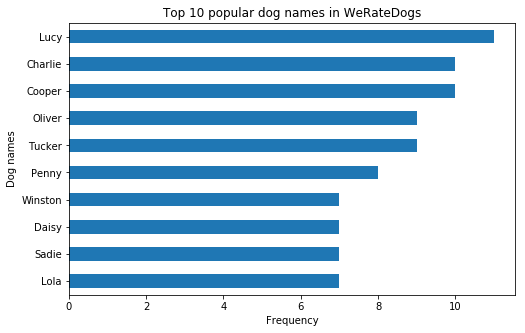

In [86]:
top10_names = archive_clean.name.value_counts(ascending=True).tail(10)
top10_names.plot(kind='barh', color='tab:blue', figsize=(8,5), title = 'Top 10 popular dog names in WeRateDogs')
plt.xlabel('Frequency')
plt.ylabel('Dog names');

The most popular dog name is **Lucy**, followed by **Cooper** and **Charlie**.

#### Q2. What is the most common dog stage in WeRateDogs?

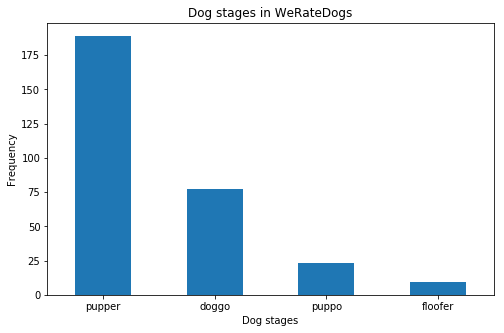

In [87]:
archive_clean.dog_stage.value_counts(ascending=False).plot(kind='bar', 
                                                          color='tab:blue', 
                                                          figsize=(8,5),
                                                          title='Dog stages in WeRateDogs')
plt.xlabel('Dog stages')
plt.ylabel('Frequency')
plt.xticks(rotation=0);

The most common dog stage in WeRateDogs is **pupper**.

#### Q3. How does WeRateDogs' posting trend look like?

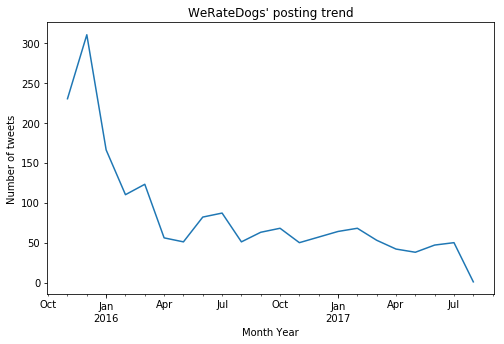

In [88]:
archive_clean.groupby(archive_clean['timestamp'].dt.to_period('M'))['tweet_id'].count().plot(figsize=(8,5))
plt.title("WeRateDogs' posting trend")
plt.xlabel('Month Year')
plt.ylabel('Number of tweets');

The number of posts peaked in Jan 2016 and then gradually decreased overtime.

#### Q4. Based on the retweet and favorite counts, how does the trend for WeRateDogs fluctuate overtime?

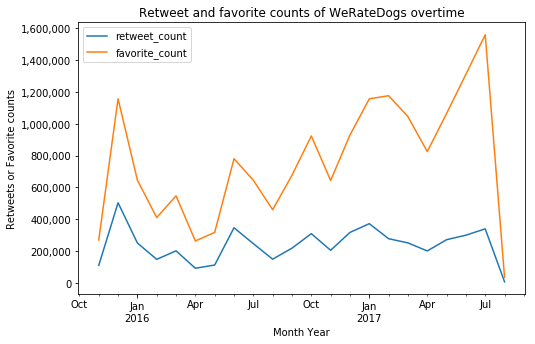

In [89]:
# Sum the retweet or favorite count, group by Month Year and plot
archive_clean.groupby(archive_clean['timestamp'].dt.to_period('M'))['retweet_count'].sum().plot(figsize=(8,5))
archive_clean.groupby(archive_clean['timestamp'].dt.to_period('M'))['favorite_count'].sum().plot(figsize=(8,5))
plt.title('Retweet and favorite counts of WeRateDogs overtime')
plt.xlabel('Month Year')
plt.ylabel('Retweets or Favorite counts')
plt.legend()

# Format y-axis with comma separator 
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

* People were more likely to react than retweet (favorite counts > retweet counts).
* The trend for favorite counts fluctuates more than that of retweet counts.

#### Q5. How does the rating distribution of WeRateDogs look like?

In [90]:
archive_clean.rating.describe()

count    1849.000000
mean        1.090118
std         0.182473
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.700000
Name: rating, dtype: float64

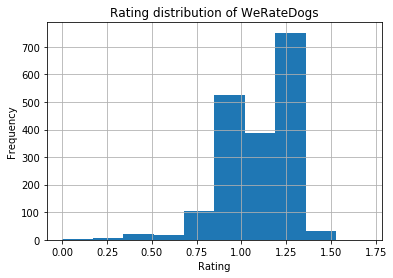

In [91]:
archive_clean.rating.hist()
plt.title('Rating distribution of WeRateDogs')
plt.xlabel('Rating')
plt.ylabel('Frequency');

There are 1849 legitimate ratings in the dataset. The lowest is `0`, the highest is `1.7`. 

The rating is not normally distributed, but right-skewed. The most popular rating is `1.2` (account for 75%).

#### Q6. Which dog breeds have the highest number of tweets, retweets and favorite counts?

To solve this question, I will:
* Identify the most accurate image for each `tweet_id` in `image_clean`: `accuracy` is True & `confidence` is max.
* Limit the highest number of **tweets**, **retweets** and **favorite counts** in `archive_clean` to just 10 
* Inner join each dataframe in Step 2 with accurate dog images in Step 1

In [92]:
# Take out pictures that have accuracy = True and max confidence for each tweet_id`
high_accurate_images = image_clean.query('accuracy == True')
high_accurate_images = high_accurate_images.groupby('tweet_id', as_index=False)['confidence'].max()

# Inner join with the original image_clean dataframe
high_accurate_images = image_clean.merge(high_accurate_images, how='inner', on=['tweet_id', 'confidence'])

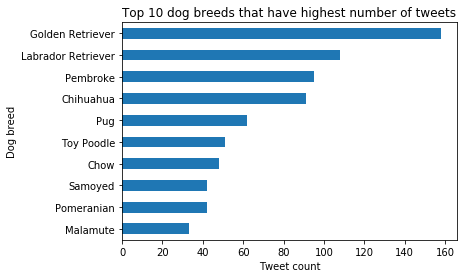

In [93]:
# 10 Dog breeds that have highest number of tweets
high_accurate_images['dog_breed'].value_counts(ascending=True).tail(10).plot(kind='barh', color='tab:blue')
plt.title('Top 10 dog breeds that have highest number of tweets')
plt.xlabel('Tweet count')
plt.ylabel('Dog breed');

**Golden Retriever** is the dog breed that has the highest number of **tweets**.

In [94]:
# Top 10 highest retweet
top10_retweets_df = archive_clean.query('retweet_count in retweet_count.nlargest(10)')

# Top 10 highest favorite counts
top10_favorite_counts_df = archive_clean.query('favorite_count in favorite_count.nlargest(10)')

In [95]:
# Inner join each top 10 dataframe above with high_accurate_images to take out top 10 dog_breed
breed_retweet = top10_retweets_df.merge(high_accurate_images, how='inner', on='tweet_id')
breed_favorite_count = top10_favorite_counts_df.merge(high_accurate_images, how='inner', on='tweet_id')

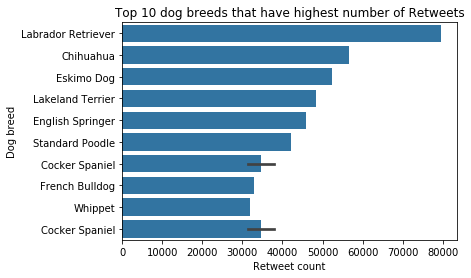

In [96]:
# 10 Dog breeds that have highest number of retweets
sns.barplot(x='retweet_count', y='dog_breed', orient='h', data=breed_retweet, color='tab:blue',
            order=breed_retweet.sort_values('retweet_count', ascending=False).dog_breed)
plt.title('Top 10 dog breeds that have highest number of Retweets')
plt.xlabel('Retweet count')
plt.ylabel('Dog breed');

**Labrador Retriever** is the dog breed that has the highest number of **retweets**.

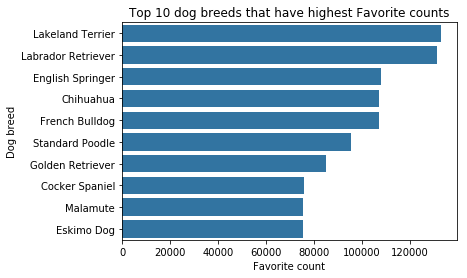

In [97]:
# 10 Dog breeds that have the highest favorite counts
sns.barplot(x='favorite_count', y='dog_breed', orient='h', data=breed_favorite_count, color='tab:blue',
            order=breed_favorite_count.sort_values('favorite_count', ascending=False).dog_breed)
plt.title('Top 10 dog breeds that have highest Favorite counts')
plt.xlabel('Favorite count')
plt.ylabel('Dog breed');

**Lakeland Terrier** is the dog breed that has the highest number of **favorite counts**.

#### Q7. Is there any correlation between retweet and favorite counts?

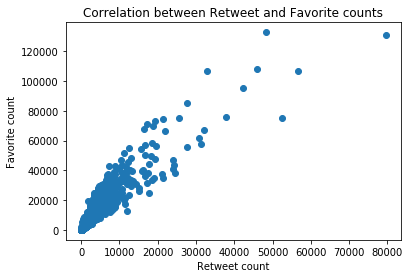

In [98]:
plt.scatter(x=archive_clean['retweet_count'], y=archive_clean['favorite_count'])
plt.title('Correlation between Retweet and Favorite counts')
plt.xlabel('Retweet count')
plt.ylabel('Favorite count');

There is a positive correlation between retweet and favorite counts.

___